# *Applied Data Science Capstone Project. The Battle of Neighborhoods*


## Is it easy to be an Art Dealer in Lindon? ##

#### Author: Irina Chernova 

_Exploration of London neigbourhoods for the Art Dealer company in order to find out the best place for their office_

_First of all, we sould import all nessesary libraries in our project_

In [178]:
import numpy as np
import pandas as pd
import datetime as dt # Datetime
import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
# use the inline backend to generate the plots within the browser
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors

#!conda install -c conda-forge folium=0.5.0 --yes
import folium #import folium # map rendering library

print('Libraries imported.')

Libraries imported.


### Import and process of data

_All *.csv files were uploaded and placed into the project working directory for ease of use. And now we just should load it into the pandas dataframe_ 

In [179]:
df_ppd = pd.read_csv("Arts_centres.csv")

# Assign column names
df_ppd.columns = ['name','address1','address2','address3','borough_code','borough_name','os_addressbase_uprn','ward_2018_code','ward_2018_name','website','longitude','latitude','easting','northing','runtime']

In [113]:
df_ppd.head()

,name,address1,address2,address3,borough_code,borough_name,os_addressbase_uprn,ward_2018_code,ward_2018_name,website,longitude,latitude,easting,northing,runtime
0,Arts Depot,5 Nether St,North Finchley,NaN,E09000003,Barnet,200196017,E05000061,West Finchley,https://www.artsdepot.co.uk/,-0.176700,51.612816,526343.096417,192017.259598,06/30/2019
1,Battersea Arts Centre,Lavender Hill,NaN,NaN,E09000032,Wandsworth,121015942,E05000623,Shaftesbury,https://www.bac.org.uk/,-0.160814,51.465163,527855.740757,175625.122339,06/30/2019
2,Bernie Grant Arts Centre,Town Hall Approach Rd,Tottenham Green,NaN,E09000014,Haringey,10003985252,E05000280,Tottenham Green,https://www.berniegrantcentre.co.uk/,-0.073076,51.587475,533591.746190,189383.266010,06/30/2019
3,Chats Palace,42-44 Brooksby's Walk,NaN,NaN,E09000012,Hackney,100023020798,E05009379,King's Park,https://chatspalace.com/,-0.042683,51.550264,535807.890082,185301.203984,06/30/2019
4,Dugdale,39 London Road,Enfield,NaN,E09000010,Enfield,207007119,E05000200,Grange,https://www.dugdalecentre.co.uk/,-0.081118,51.650318,532851.126559,196357.004268,06/30/2019


In [114]:
df_ppd.shape

(26, 15)

In [180]:
df_art = pd.read_csv("Commercial_galleries.csv")

# Assign column names
df_art.columns = ['name','address1','address2','address3','borough_code','borough_name','os_addressbase_uprn','ward_2018_code','ward_2018_name','website','longitude','latitude','easting','northing','runtime']

In [116]:
df_art.head()

,name,address1,address2,address3,borough_code,borough_name,os_addressbase_uprn,ward_2018_code,ward_2018_name,website,longitude,latitude,easting,northing,runtime
0,Domobaal,3 John Street,NaN,NaN,E09000007,Camden,10091862142,E05000138,Holborn and Covent Garden,http://www.domobaal.com/#,-0.114705,51.521607,530896.787348,181983.245705,07/07/2019
1,Eagle Gallery,159 Farringdon Road,NaN,NaN,E09000019,Islington,5300033028,E05000370,Clerkenwell,http://www.emmahilleagle.com/#,-0.109756,51.524162,531232.794859,182276.254304,07/07/2019
2,Work,308 Essex Road,NaN,NaN,E09000019,Islington,10091003649,E05000369,Canonbury,http://workgallery.co.uk/#,-0.091358,51.542838,532454.840192,184386.267492,07/07/2019
3,Usurp,140 Vaughan Road,NaN,NaN,E09000015,Harrow,100021292207,E05000305,West Harrow,http://www.usurp.org.uk/exhibitions/#,-0.349347,51.579046,514474.491147,187977.615093,07/07/2019
4,Catto Gallery,100 Heath Street,NaN,NaN,E09000007,Camden,5010317,E05000135,Hampstead Town,http://www.cattogallery.co.uk/#,-0.178459,51.558503,526371.753234,185974.312188,07/07/2019


In [117]:
df_art.shape

(306, 15)

In [181]:
frames = [df_art, df_ppd]

df = pd.concat(frames)
df.shape

(332, 15)

In [119]:
df.head(6)

,name,address1,address2,address3,borough_code,borough_name,os_addressbase_uprn,ward_2018_code,ward_2018_name,website,longitude,latitude,easting,northing,runtime
0,Domobaal,3 John Street,NaN,NaN,E09000007,Camden,10091862142,E05000138,Holborn and Covent Garden,http://www.domobaal.com/#,-0.114705,51.521607,530896.787348,181983.245705,07/07/2019
1,Eagle Gallery,159 Farringdon Road,NaN,NaN,E09000019,Islington,5300033028,E05000370,Clerkenwell,http://www.emmahilleagle.com/#,-0.109756,51.524162,531232.794859,182276.254304,07/07/2019
2,Work,308 Essex Road,NaN,NaN,E09000019,Islington,10091003649,E05000369,Canonbury,http://workgallery.co.uk/#,-0.091358,51.542838,532454.840192,184386.267492,07/07/2019
3,Usurp,140 Vaughan Road,NaN,NaN,E09000015,Harrow,100021292207,E05000305,West Harrow,http://www.usurp.org.uk/exhibitions/#,-0.349347,51.579046,514474.491147,187977.615093,07/07/2019
4,Catto Gallery,100 Heath Street,NaN,NaN,E09000007,Camden,5010317,E05000135,Hampstead Town,http://www.cattogallery.co.uk/#,-0.178459,51.558503,526371.753234,185974.312188,07/07/2019
5,Freespace Gallery,2 Bartholomew Road,NaN,NaN,E09000007,Camden,5021000,E05000131,Cantelowes,http://freespacegallery.org/#,-0.139929,51.546406,529076.790327,184696.306914,07/07/2019


In [182]:
df = df[['borough_code','borough_name','latitude','longitude']]
df.head()


,borough_code,borough_name,latitude,longitude
0,E09000007,Camden,51.521607,-0.114705
1,E09000019,Islington,51.524162,-0.109756
2,E09000019,Islington,51.542838,-0.091358
3,E09000015,Harrow,51.579046,-0.349347
4,E09000007,Camden,51.558503,-0.178459


_Let's perform some computations and load aggregated data in the new resulting dataset_ 

In [183]:
dfm = df.groupby(['borough_name']).mean()
dfm.head()
dfm.shape

(27, 2)

In [184]:
dfn = df[['borough_code','borough_name']]
#dfn.head()
dfn.shape

(332, 2)

In [185]:
dfn['cnt'] = dfn.groupby('borough_name')['borough_name'].transform('count') # [dfn.groupby('borough_name').count() ]
dfn.head()

/home/jupyterlab/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,borough_code,borough_name,cnt
0,E09000007,Camden,34
1,E09000019,Islington,17
2,E09000019,Islington,17
3,E09000015,Harrow,2
4,E09000007,Camden,34


In [186]:
dfn=dfn.drop_duplicates(['borough_code','borough_name', 'cnt'])[['borough_code','borough_name', 'cnt']]
dfn

,borough_code,borough_name,cnt
0,E09000007,Camden,34
1,E09000019,Islington,17
3,E09000015,Harrow,2
34,E09000030,Tower Hamlets,26
58,E09000009,Ealing,1
59,E09000013,Hammersmith and Fulham,6
63,E09000024,Merton,1
64,E09000001,City and County of the City of London,5
66,E09000032,Wandsworth,9
67,E09000005,Brent,2


__Let's visualize obtained data as a barchart__  

In [187]:
dfn = dfn[['borough_name', 'cnt']]
dfn.head()

,borough_name,cnt
0,Camden,34
1,Islington,17
3,Harrow,2
34,Tower Hamlets,26
58,Ealing,1


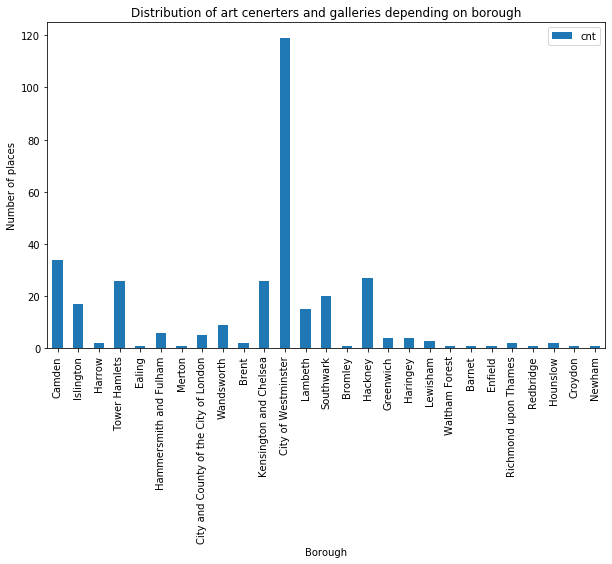

In [188]:
dfn.set_index('borough_name', inplace=True)
dfn.plot(kind='bar', figsize=(10, 6))

plt.xlabel('Borough') # add to x-label to the plot
plt.ylabel('Number of places') # add y-label to the plot
plt.title('Distribution of art cenerters and galleries depending on borough') # add title to the plot

plt.show()

_Let's take a closer look at some statistics:_ 

In [190]:
dfn.describe(include='all')

,cnt
count,27.000000
mean,12.296296
std,23.564665
min,1.000000
25%,1.000000
50%,3.000000
75%,16.000000
max,119.000000


_As we see 50 percent of values are less then 3, which means that 50% of boroughs include 3 or less Art Centres&Galeries so we shouldn't be interested in exploration of such boroughs. Thus I've choosen for further exploration and clustering those boroughs which include more than 4 Art Centres&Galeries. 
So we can obtain a new result set :_       

In [129]:
dfn = dfn[dfn.cnt>4]
dfn.reset_index(inplace=True)
#dfn.drop('index',axis=1, inplace=True)
dfn.shape

(11, 3)

_As we see from our preliminary exploration, there are 11 boroughs which could be interesting for our client. So we should perform deeply exploration of those 8 boroughs_  

In [131]:
dfn = dfn.sort_values('borough_name')
dfn.drop('index',axis=1, inplace=True)
dfn

,borough_name,cnt
0,Camden,34
4,City and County of the City of London,5
7,City of Westminster,119
10,Hackney,27
3,Hammersmith and Fulham,6
1,Islington,17
6,Kensington and Chelsea,26
8,Lambeth,15
9,Southwark,20
2,Tower Hamlets,26


In [132]:
#dfm.dtypes
dfm['latitude'] = dfm['latitude'].apply(lambda x: round(x, 3))
dfm['longitude'] = dfm['longitude'].apply(lambda x: round(x, 3))
#dfn['latitude']  =  dfm['latitude']  
#dfn['longitude'] = dfm['longitude']  
dfm.head(10)

,latitude,longitude
borough_name,,
Barnet,51.613,-0.177
Brent,51.547,-0.226
Bromley,51.381,-0.030
Camden,51.528,-0.137
City and County of the City of London,51.516,-0.092
City of Westminster,51.512,-0.145
Croydon,51.373,-0.096
Ealing,51.511,-0.307
Enfield,51.650,-0.081


_And now we should combine geographical data and quantitative data frame into the new resulting dataset_

In [133]:
dfm.reset_index(inplace=True)
dfl = dfm.loc[dfm['borough_name'].isin(dfn['borough_name'])]
dfl = dfl.sort_values('borough_name')
#dfl.reset_index(inplace=True)
dfl

,borough_name,latitude,longitude
3,Camden,51.528,-0.137
4,City and County of the City of London,51.516,-0.092
5,City of Westminster,51.512,-0.145
10,Hackney,51.534,-0.075
11,Hammersmith and Fulham,51.490,-0.212
15,Islington,51.531,-0.104
16,Kensington and Chelsea,51.499,-0.185
17,Lambeth,51.483,-0.118
23,Southwark,51.491,-0.080
24,Tower Hamlets,51.525,-0.061


In [134]:
dfn.set_index('borough_name', inplace=True)
dfn

,cnt
borough_name,
Camden,34
City and County of the City of London,5
City of Westminster,119
Hackney,27
Hammersmith and Fulham,6
Islington,17
Kensington and Chelsea,26
Lambeth,15
Southwark,20


In [135]:
dfl.set_index('borough_name', inplace=True)
dfn['latitude']  =  dfl['latitude']  
dfn['longitude'] = dfl['longitude']  
dfn

,cnt,latitude,longitude
borough_name,,,
Camden,34,51.528,-0.137
City and County of the City of London,5,51.516,-0.092
City of Westminster,119,51.512,-0.145
Hackney,27,51.534,-0.075
Hammersmith and Fulham,6,51.490,-0.212
Islington,17,51.531,-0.104
Kensington and Chelsea,26,51.499,-0.185
Lambeth,15,51.483,-0.118
Southwark,20,51.491,-0.080


In [136]:
dfn.reset_index(inplace=True)
dfn

,borough_name,cnt,latitude,longitude
0,Camden,34,51.528,-0.137
1,City and County of the City of London,5,51.516,-0.092
2,City of Westminster,119,51.512,-0.145
3,Hackney,27,51.534,-0.075
4,Hammersmith and Fulham,6,51.490,-0.212
5,Islington,17,51.531,-0.104
6,Kensington and Chelsea,26,51.499,-0.185
7,Lambeth,15,51.483,-0.118
8,Southwark,20,51.491,-0.080
9,Tower Hamlets,26,51.525,-0.061


### Data Visualization

_Let's take a look at geographical maps built on our data. And the first map is the map of all initial datapoints - I mean distribution of all Art centers&galleries depending on boroughs_

In [137]:
address = 'London, UK'

geolocator = Nominatim()
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of London are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of London are 51.5073219, -0.1276474.


In [ ]:
# create map of London using latitude and longitude values
map_london = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, borough in zip(df['latitude'], df['longitude'], df['borough_name']):
    label = '{}, {}'.format(lat, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_london)  
    
map_london

<img src="https://github.com/IreneCh25/Capstone-Project-Repository/blob/master/The%20Battle%20of%20Neighborhoods/Maps/London_art_Borough_all.JPG?raw=true" alt="The Map of London. All Art Centers&Galleries" title="The Map of London. All Art Centers&Galleries">

In [ ]:
# create map of London using latitude and longitude values
map_london2 = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, borough in zip(dfm['latitude'], dfm['longitude'], dfm['borough_name']):
    label = '{}, {}'.format(dfm, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='black',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_london2)  
    
map_london2

<img src="https://github.com/IreneCh25/Capstone-Project-Repository/blob/master/The%20Battle%20of%20Neighborhoods/Maps/London_Boroughs_by_means.JPG?raw=true" alt="The Map of London. All boroughs" title="The Map of London. All boroughs">

_And here we draw just selected boroughs_

In [ ]:
# create map of London using latitude and longitude values
map_london3 = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, borough in zip(dfn['latitude'], dfn['longitude'], dfn['borough_name']):
    label = '{}, {}'.format(dfn, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=8,
        popup=label,
        color='black',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_london3)  
    
map_london3

<img src="https://github.com/IreneCh25/Capstone-Project-Repository/blob/master/The%20Battle%20of%20Neighborhoods/Maps/London_selected_boroughs_Main2.JPG?raw=true" alt="The Map of London. Selected boroughs" title="The Map of London. Selected boroughs">

In [ ]:
CLIENT_ID = '***' # your Foursquare ID
CLIENT_SECRET = '***' # your Foursquare Secret
VERSION = '20190630' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

_let's recall the shape of the result data frame which we going to examine and names of selected boroughs_ 

In [144]:
dfn

,borough_name,cnt,latitude,longitude
0,Camden,34,51.528,-0.137
1,City and County of the City of London,5,51.516,-0.092
2,City of Westminster,119,51.512,-0.145
3,Hackney,27,51.534,-0.075
4,Hammersmith and Fulham,6,51.490,-0.212
5,Islington,17,51.531,-0.104
6,Kensington and Chelsea,26,51.499,-0.185
7,Lambeth,15,51.483,-0.118
8,Southwark,20,51.491,-0.080
9,Tower Hamlets,26,51.525,-0.061


_And finally we begin heighborhood exploration using Foursquare API. And at first we examine just one borough. It should be Camden_

In [145]:
neighborhood_latitude = dfn.loc[0, 'latitude'] # neighborhood latitude value
neighborhood_longitude = dfn.loc[0, 'longitude'] # neighborhood longitude value

neighborhood_name = dfn.loc[0, 'borough_name'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of Camden are 51.528, -0.137.


In [146]:
LIMIT = 100 # limit of number of venues returned by Foursquare API
radius = 500 # define radius

# create URL
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)
url # display URL

'https://api.foursquare.com/v2/venues/explore?&client_id=P5FRQ54L5KSCZASQMXUSHFQT2ZO2DK10SSPDSFPJE14ZWPTI&client_secret=L4ISFZWLMOHIEZR5V4TQ4HKFCOHESAUYRSHF1SAWJUTXAVHX&v=20190630&ll=51.528,-0.137&radius=500&limit=100'

In [147]:
results = requests.get(url).json()
#results

In [148]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [149]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head(10)

,name,categories,lat,lng
0,Brizzi's,Italian Restaurant,51.527056,-0.136961
1,Mestizo,Mexican Restaurant,51.527707,-0.138723
2,Wellcome Collection,Science Museum,51.525861,-0.133907
3,Wellcome Collection Reading Room,Library,51.526036,-0.133561
4,Diwana Bhel Poori House,Indian Restaurant,51.527165,-0.136578
5,The Euston Tap,Beer Bar,51.526962,-0.132531
6,Speedy's Cafe,Breakfast Spot,51.526300,-0.136734
7,Magic Circle Headquarters,Museum,51.526516,-0.135294
8,Roti King,Malay Restaurant,51.528862,-0.132043
9,African Kitchen Gallery,African Restaurant,51.527265,-0.136386


In [150]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

52 venues were returned by Foursquare.


_As soon as we get information abut number of venues and their categories, let's perform the same for all our resulting dataset_   

In [151]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [152]:
london_venues = getNearbyVenues(names=dfn['borough_name'],
                                   latitudes=dfn['latitude'],
                                   longitudes=dfn['longitude']
                                  )

Camden
City and County of the City of London
City of Westminster
Hackney
Hammersmith and Fulham
Islington
Kensington and Chelsea
Lambeth
Southwark
Tower Hamlets
Wandsworth


In [153]:
london_venues.shape

(597, 7)

In [154]:
london_venues.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Camden,51.528,-0.137,Brizzi's,51.527056,-0.136961,Italian Restaurant
1,Camden,51.528,-0.137,Mestizo,51.527707,-0.138723,Mexican Restaurant
2,Camden,51.528,-0.137,Wellcome Collection,51.525861,-0.133907,Science Museum
3,Camden,51.528,-0.137,Wellcome Collection Reading Room,51.526036,-0.133561,Library
4,Camden,51.528,-0.137,Diwana Bhel Poori House,51.527165,-0.136578,Indian Restaurant


_Now we have got all venues data we need, let's compare number of venues with number of art centers and galleries_

In [156]:
df_tot = london_venues.groupby('Neighborhood').count()
df_tot = df_tot[['Venue']] 
dfn.set_index('borough_name', inplace=True)
df_tot['Art_centres'] = dfn['cnt']
dfn.reset_index(inplace=True)
#df_tot.reset_index(inplace=True)
#df_tot.set_index('borough_name', inplace=True)
df_tot = df_tot.sort_values(['Venue'], ascending=[False])
df_tot.head()
#dfn.head()

,Venue,Art_centres
Neighborhood,,
City and County of the City of London,100,5
City of Westminster,100,119
Islington,78,17
Tower Hamlets,66,26
Camden,52,34


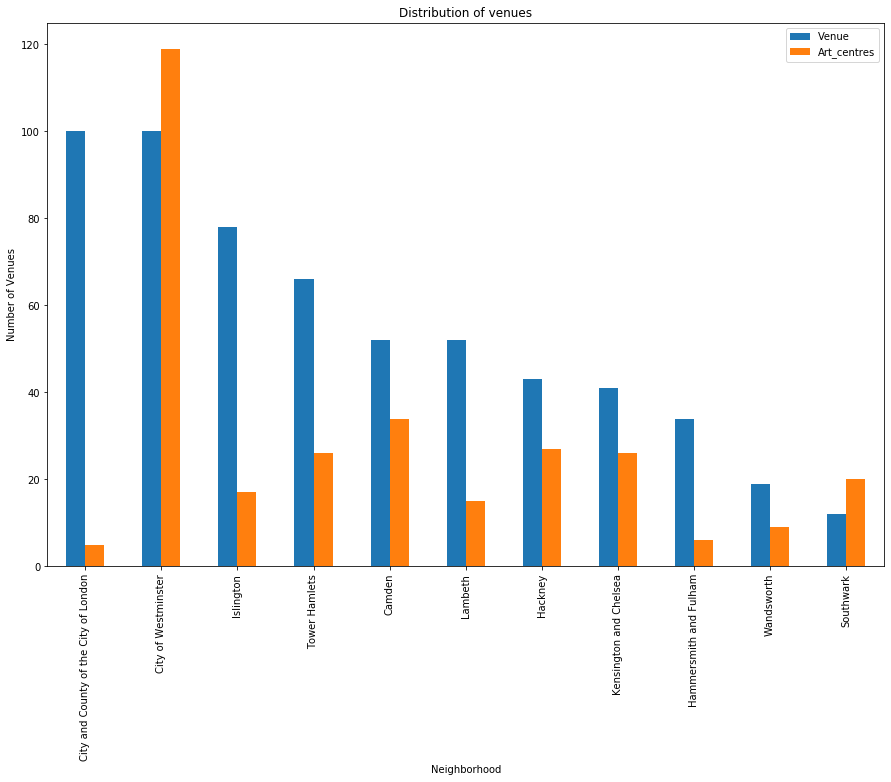

In [157]:
ax = df_tot.plot(kind = "bar", title ="Distribution of venues", figsize=(15, 10), legend=True, fontsize=10) 
#ax = df[['V1','V2']].plot(kind='bar', title ="V comp", figsize=(15, 10), legend=True, fontsize=12)
ax.set_xlabel('Neighborhood', fontsize=10)
ax.set_ylabel("Number of Venues", fontsize=10)

plt.show()

### Analyze Each Neighborhood

In [159]:
london_onehot.shape

(597, 170)

In [160]:
london_grouped = london_onehot.groupby('Neighborhood').mean().reset_index()
london_grouped

,Neighborhood,Accessories Store,African Restaurant,Arcade,Arepa Restaurant,Art Gallery,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Austrian Restaurant,...,Udon Restaurant,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Warehouse Store,Watch Shop,Wine Bar,Wine Shop,Women's Store,Yoga Studio
0,Camden,0.00,0.019231,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00,0.000000,0.019231,0.019231,0.000000,0.00,0.000000,0.00,0.00,0.000000
1,City and County of the City of London,0.00,0.000000,0.000000,0.000000,0.030000,0.000000,0.020000,0.000000,0.000000,...,0.01,0.000000,0.000000,0.030000,0.000000,0.00,0.020000,0.00,0.00,0.020000
2,City of Westminster,0.01,0.000000,0.000000,0.000000,0.110000,0.000000,0.000000,0.000000,0.000000,...,0.00,0.000000,0.000000,0.000000,0.000000,0.01,0.000000,0.01,0.02,0.000000
3,Hackney,0.00,0.000000,0.023256,0.023256,0.023256,0.000000,0.000000,0.000000,0.000000,...,0.00,0.000000,0.000000,0.116279,0.000000,0.00,0.023256,0.00,0.00,0.023256
4,Hammersmith and Fulham,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.00,0.00,0.000000
5,Islington,0.00,0.000000,0.000000,0.000000,0.012821,0.025641,0.012821,0.000000,0.012821,...,0.00,0.012821,0.000000,0.012821,0.000000,0.00,0.000000,0.00,0.00,0.012821
6,Kensington and Chelsea,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.024390,0.000000,0.000000,...,0.00,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.00,0.00,0.000000
7,Lambeth,0.00,0.000000,0.000000,0.000000,0.019231,0.019231,0.000000,0.019231,0.000000,...,0.00,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.00,0.00,0.000000
8,Southwark,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00,0.000000,0.000000,0.000000,0.083333,0.00,0.000000,0.00,0.00,0.000000
9,Tower Hamlets,0.00,0.000000,0.000000,0.000000,0.015152,0.000000,0.015152,0.000000,0.000000,...,0.00,0.000000,0.000000,0.000000,0.000000,0.00,0.015152,0.00,0.00,0.015152


_Let's take a look at the most common venues in each Neighborhood_

In [161]:
num_top_venues = 5

for hood in london_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = london_grouped[london_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Camden----
                  venue  freq
0           Coffee Shop  0.10
1  Gym / Fitness Center  0.10
2              Beer Bar  0.06
3               Theater  0.06
4     Indian Restaurant  0.04


----City and County of the City of London----
                   venue  freq
0            Coffee Shop  0.11
1     Italian Restaurant  0.04
2  Vietnamese Restaurant  0.03
3            Art Gallery  0.03
4       Sushi Restaurant  0.03


----City of Westminster----
               venue  freq
0        Art Gallery  0.11
1     Clothing Store  0.09
2           Boutique  0.08
3  Indian Restaurant  0.05
4  French Restaurant  0.04


----Hackney----
                   venue  freq
0                   Café  0.12
1  Vietnamese Restaurant  0.12
2                    Pub  0.07
3                 Bakery  0.05
4          Grocery Store  0.05


----Hammersmith and Fulham----
                venue  freq
0                 Pub  0.15
1       Grocery Store  0.12
2         Coffee Shop  0.09
3  Italian Restaurant  0.06
4 

#### Let's put that into a *pandas* dataframe

In [162]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

_Now let's create the new dataframe and display the top 10 venues for each neighborhood._

In [163]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = london_grouped['Neighborhood']

for ind in np.arange(london_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(london_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Camden,Coffee Shop,Gym / Fitness Center,Theater,Beer Bar,Indian Restaurant,Plaza,Pub,Café,Science Museum,Sushi Restaurant
1,City and County of the City of London,Coffee Shop,Italian Restaurant,Seafood Restaurant,Art Gallery,Sushi Restaurant,Restaurant,Vietnamese Restaurant,Steakhouse,History Museum,Roof Deck
2,City of Westminster,Art Gallery,Clothing Store,Boutique,Indian Restaurant,French Restaurant,Lounge,Italian Restaurant,Cosmetics Shop,Hotel,Tailor Shop
3,Hackney,Vietnamese Restaurant,Café,Pub,Grocery Store,Bakery,Yoga Studio,Soccer Field,Middle Eastern Restaurant,Jewish Restaurant,Convenience Store
4,Hammersmith and Fulham,Pub,Grocery Store,Coffee Shop,Hotel,Thai Restaurant,Italian Restaurant,Café,Performing Arts Venue,Cocktail Bar,Pizza Place


### Cluster Neighborhoods

In [164]:
# set number of clusters
from sklearn.cluster import KMeans
kclusters = 5

london_grouped_clustering = london_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(london_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([0, 0, 3, 1, 1, 0, 2, 0, 4, 1], dtype=int32)

_And we going to use the k-means method for clustering neighborhoods using data acquired from the Foursquare API. We define a target number k = 5, which refers to the number of centroids we need in the dataset. A centroid is the imaginary location representing the center of the cluster_ 

In [165]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)
london_merged = dfn #london_data

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
london_merged = london_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='borough_name')

london_merged.head()


,borough_name,cnt,latitude,longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Camden,34,51.528,-0.137,0,Coffee Shop,Gym / Fitness Center,Theater,Beer Bar,Indian Restaurant,Plaza,Pub,Café,Science Museum,Sushi Restaurant
1,City and County of the City of London,5,51.516,-0.092,0,Coffee Shop,Italian Restaurant,Seafood Restaurant,Art Gallery,Sushi Restaurant,Restaurant,Vietnamese Restaurant,Steakhouse,History Museum,Roof Deck
2,City of Westminster,119,51.512,-0.145,3,Art Gallery,Clothing Store,Boutique,Indian Restaurant,French Restaurant,Lounge,Italian Restaurant,Cosmetics Shop,Hotel,Tailor Shop
3,Hackney,27,51.534,-0.075,1,Vietnamese Restaurant,Café,Pub,Grocery Store,Bakery,Yoga Studio,Soccer Field,Middle Eastern Restaurant,Jewish Restaurant,Convenience Store
4,Hammersmith and Fulham,6,51.490,-0.212,1,Pub,Grocery Store,Coffee Shop,Hotel,Thai Restaurant,Italian Restaurant,Café,Performing Arts Venue,Cocktail Bar,Pizza Place


_Finally, let's visualize the resulting clusters_


In [ ]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(london_merged['latitude'], london_merged['longitude'], london_merged['borough_name'], london_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=8,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.9).add_to(map_clusters)
       
map_clusters

<img src="https://github.com/IreneCh25/Capstone-Project-Repository/blob/master/The%20Battle%20of%20Neighborhoods/Maps/London_claster_map_Main2.JPG?raw=true" alt="The Map of London. Clusters" title="The Map of London. Clusters">

In [168]:
london_merged.loc[london_merged['Cluster Labels'] == 0, london_merged.columns[[0]+[1] + list(range(5, london_merged.shape[1]))]]

,borough_name,cnt,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Camden,34,Coffee Shop,Gym / Fitness Center,Theater,Beer Bar,Indian Restaurant,Plaza,Pub,Café,Science Museum,Sushi Restaurant
1,City and County of the City of London,5,Coffee Shop,Italian Restaurant,Seafood Restaurant,Art Gallery,Sushi Restaurant,Restaurant,Vietnamese Restaurant,Steakhouse,History Museum,Roof Deck
5,Islington,17,Pub,Coffee Shop,Café,Sandwich Place,Gym / Fitness Center,Theater,Sushi Restaurant,French Restaurant,Nightclub,Supermarket
7,Lambeth,15,Café,Pub,Coffee Shop,Gay Bar,Nightclub,Indian Restaurant,Hotel,Italian Restaurant,Korean Restaurant,Cricket Ground


In [169]:
london_merged.loc[london_merged['Cluster Labels'] == 1, london_merged.columns[[0] +[1]+ list(range(5, london_merged.shape[1]))]]

,borough_name,cnt,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
3,Hackney,27,Vietnamese Restaurant,Café,Pub,Grocery Store,Bakery,Yoga Studio,Soccer Field,Middle Eastern Restaurant,Jewish Restaurant,Convenience Store
4,Hammersmith and Fulham,6,Pub,Grocery Store,Coffee Shop,Hotel,Thai Restaurant,Italian Restaurant,Café,Performing Arts Venue,Cocktail Bar,Pizza Place
9,Tower Hamlets,26,Café,Coffee Shop,Pub,Grocery Store,Park,Fast Food Restaurant,Pizza Place,Bakery,Turkish Restaurant,Church
10,Wandsworth,9,Café,Pub,Coffee Shop,Indian Restaurant,Bar,Pizza Place,English Restaurant,Beer Store,Chinese Restaurant,Thai Restaurant


In [170]:
london_merged.loc[london_merged['Cluster Labels'] == 2, london_merged.columns[[0]+[1] + list(range(5, london_merged.shape[1]))]]

,borough_name,cnt,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
6,Kensington and Chelsea,26,Hotel,Indian Restaurant,Chinese Restaurant,Restaurant,Italian Restaurant,French Restaurant,Clothing Store,Pub,Dance Studio,Coffee Shop


In [171]:
london_merged.loc[london_merged['Cluster Labels'] == 3, london_merged.columns[[0]+[1] + list(range(5, london_merged.shape[1]))]]

,borough_name,cnt,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
2,City of Westminster,119,Art Gallery,Clothing Store,Boutique,Indian Restaurant,French Restaurant,Lounge,Italian Restaurant,Cosmetics Shop,Hotel,Tailor Shop


In [172]:
london_merged.loc[london_merged['Cluster Labels'] == 4, london_merged.columns[[0]+[1] + list(range(5, london_merged.shape[1]))]]

,borough_name,cnt,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
8,Southwark,20,Pub,Public Art,Bar,Dessert Shop,Convenience Store,Pizza Place,Coffee Shop,Bus Stop,Supermarket,Hotel
